In [1]:
cd /content/drive/My Drive/DL/CS 189/hw1

/content/drive/My Drive/DL/CS 189/hw1


In [2]:
import sys
if sys.version_info[0] < 3:
  raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
for data_name in ["mnist", "spam", "cifar10"]:
  data = io.loadmat("data/%s_data.mat" % data_name)
  print("\nloaded %s data!" % data_name)
  fields = "test_data", "training_data", "training_labels"
  for field in fields:
    print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


**2.Data Partitioning**

In [0]:
mnist_data = io.loadmat("data/mnist_data.mat")
mnist_train = mnist_data["training_data"][:-10000]
mnist_train_label = mnist_data["training_labels"][:-10000]
mnist_val = mnist_data["training_data"][-10000:]
mnist_val_label = mnist_data["training_labels"][-10000:]

spam_data = io.loadmat("data/spam_data.mat")
state = np.random.get_state()
spam_train = spam_data["training_data"]
spam_train_label = spam_data["training_labels"]
np.random.shuffle(spam_train)
np.random.set_state(state)
np.random.shuffle(spam_train_label)

num = int(0.8*spam_data["training_data"].shape[0])
spam_val = spam_train[num:]
spam_val_label = spam_train_label[num:]
spam_train = spam_train[:num]
spam_train_label = spam_train_label[:num]


cifar10_data = io.loadmat("data/cifar10_data.mat")
cifar10_train = cifar10_data["training_data"]
cifar10_label = cifar10_data["training_labels"]
state = np.random.get_state()
np.random.shuffle(cifar10_train)
np.random.set_state(state)
np.random.shuffle(cifar10_label)

cifar10_train = cifar10_data["training_data"][:-5000]
cifar10_train_label = cifar10_data["training_labels"][:-5000]
cifar10_val = cifar10_data["training_data"][-5000:]
cifar10_val_label = cifar10_data["training_labels"][-5000:]

**3.Support Vector Machines: Coding**

In [0]:
from sklearn.metrics import accuracy_score
mnist_train, mnist_val = (mnist_train-np.mean(mnist_train))/np.std(mnist_train), (mnist_val-np.mean(mnist_val))/np.std(mnist_val)

def train(train_data, train_label, val_data, val_label, num_example, kernel='linear'):
  train_label, val_label = train_label.reshape(-1,), val_label.reshape(-1,)
  model = svm.SVC(kernel=kernel)
  model.fit(train_data[:num_example],train_label[:num_example])
  acc1 = accuracy_score(train_label[:num_example],model.predict(train_data[:num_example,:]))
  acc2 = accuracy_score(val_label[:num_example],model.predict(val_data[:num_example,:]))
  return acc1, acc2

num_example: 100 train_acc: 1.0 val_acc:0.64
num_example: 200 train_acc: 1.0 val_acc:0.795
num_example: 500 train_acc: 1.0 val_acc:0.834
num_example: 1000 train_acc: 1.0 val_acc:0.856
num_example: 2000 train_acc: 1.0 val_acc:0.899
num_example: 5000 train_acc: 1.0 val_acc:0.9018
num_example: 10000 train_acc: 1.0 val_acc:0.9188


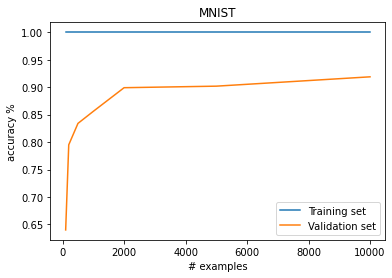

In [5]:
nexample=[100, 200, 500, 1000, 2000, 5000, 10000]
train_accs, val_accs = [], []
for num_example in nexample:
  train_acc, val_acc = train(mnist_train,mnist_train_label,mnist_val,mnist_val_label, num_example)
  train_accs.append(train_acc)
  val_accs.append(val_acc)
  print('num_example: {} train_acc: {} val_acc:{}'.format(num_example, train_acc, val_acc))

plt.plot(nexample,train_accs,label="Training set")
plt.plot(nexample,val_accs,label="Validation set")
plt.xlabel("# examples")
plt.ylabel("accuracy %")
plt.title("MNIST")
plt.legend()
plt.show()


Spam

num_example: 100 train_acc: 0.87 val_acc:0.8
num_example: 200 train_acc: 0.845 val_acc:0.805
num_example: 500 train_acc: 0.822 val_acc:0.818
num_example: 1000 train_acc: 0.798 val_acc:0.811
num_example: 2000 train_acc: 0.8065 val_acc:0.81256038647343
num_example: 4137 train_acc: 0.7988880831520425 val_acc:0.8077294685990338


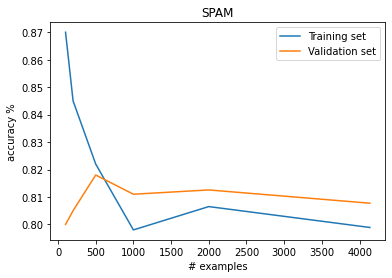

In [6]:
nexample=[100, 200, 500, 1000, 2000, spam_train.shape[0]]
train_accs, val_accs = [], []
for num_example in nexample:
  train_acc, val_acc = train(spam_train,spam_train_label,spam_val,spam_val_label, num_example)
  train_accs.append(train_acc)
  val_accs.append(val_acc)
  print('num_example: {} train_acc: {} val_acc:{}'.format(num_example, train_acc, val_acc))

plt.plot(nexample,train_accs,label="Training set")
plt.plot(nexample,val_accs,label="Validation set")
plt.xlabel("# examples")
plt.ylabel("accuracy %")
plt.title("SPAM")
plt.legend()
plt.show()

Cifar10

num_example: 100 train_acc: 1.0 val_acc:0.19
num_example: 200 train_acc: 1.0 val_acc:0.235
num_example: 500 train_acc: 1.0 val_acc:0.272
num_example: 1000 train_acc: 1.0 val_acc:0.293
num_example: 2000 train_acc: 1.0 val_acc:0.282
num_example: 5000 train_acc: 1.0 val_acc:0.2934


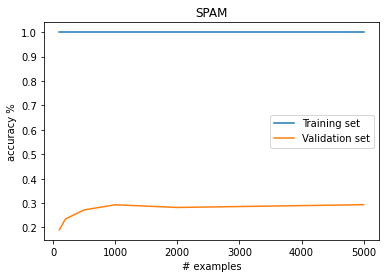

In [7]:
nexample=[100, 200, 500, 1000, 2000, 5000]
train_accs, val_accs = [], []
for num_example in nexample:
  train_acc, val_acc = train(cifar10_train,cifar10_train_label,cifar10_val,cifar10_val_label, num_example)
  train_accs.append(train_acc)
  val_accs.append(val_acc)
  print('num_example: {} train_acc: {} val_acc:{}'.format(num_example, train_acc, val_acc))

plt.plot(nexample,train_accs,label="Training set")
plt.plot(nexample,val_accs,label="Validation set")
plt.xlabel("# examples")
plt.ylabel("accuracy %")
plt.title("SPAM")
plt.legend()
plt.show()

**4.Hyperparameter Tuning**

In [0]:
def train_hyper(train_data, train_label, val_data, val_label, num_example, C, kernel='linear'):
  train_label, val_label = train_label.reshape(-1,), val_label.reshape(-1,)
  model = svm.SVC(kernel=kernel, C=C, gamma="auto")
  model.fit(train_data[:num_example],train_label[:num_example])
  acc = accuracy_score(val_label[:num_example],model.predict(val_data[:num_example,:]))
  return acc

In [9]:
num_example = 10000
Cs = [0.001, 0.01, 0.1, 0.25, 0.5, 1.0, 1.5, 2.0]
max_acc=0
for C in Cs:
  val_acc = train_hyper(mnist_train, mnist_train_label, mnist_val, mnist_val_label, num_example, C)
  print("C={} acc={}".format(C, val_acc))
  if val_acc > max_acc:
    max_acc = val_acc
    max_C = C
print("The best C value is {}".format(max_C))

C=0.001 acc=0.9306
C=0.01 acc=0.9343
C=0.1 acc=0.9225
C=0.25 acc=0.9198
C=0.5 acc=0.9187
C=1.0 acc=0.9188
C=1.5 acc=0.9188
C=2.0 acc=0.9188
The best C value is 0.01


**5.K-Fold Cross-Validation**

In [10]:
k = 5
spam_total = spam_data["training_data"]
spam_total_label = spam_data["training_labels"]
parti = int(spam_total.shape[0]/k)
Cs = [0.5, 1.0, 1.5, 2.0, 4.0, 8.0, 16.0, 32.0]
max_acc = 0
for C in Cs:
  sum_acc = 0
  for i in range(k):
    begin = int(i*parti)
    end = int((i+1)*parti)
    val_data, val_label = spam_total[begin:end], spam_total_label[begin:end]
    train_data, train_label = np.vstack((spam_total[:begin], spam_total[end:])), \
                    np.vstack((spam_total_label[:begin], spam_total_label[end:]))
    val_acc = train_hyper(train_data, train_label, val_data, val_label, num_example, C, kernel='linear')
    sum_acc += val_acc
  print("C={}\t acc={:.4f}".format(C, sum_acc/k))
  if val_acc/k > max_acc:
    max_acc = val_acc/k
    max_C = C
print("The best C value is {:.4f}".format(max_C))

C=0.5	 acc=0.8004
C=1.0	 acc=0.8021
C=1.5	 acc=0.8029
C=2.0	 acc=0.8017
C=4.0	 acc=0.8023
C=8.0	 acc=0.8043
C=16.0	 acc=0.8044
C=32.0	 acc=0.8044
The best C value is 8.0000
